# Day 1 | Data preprocessing
_____

#### 資料前處理不管是在資料探勘、機器學習都是非常重要的一個步驟，也可說是最重要的一個步驟與最花時間的一個步驟（60-70%)。若沒做好，就算使用了再強的模型或演算法可能都不會有好的結果。
在此整理出幾個有關資料前處理的相關資源參考：
1. 目前最火的100 days ML code 挑戰 Avik-Jain：https://github.com/Avik-Jain/100-Days-Of-ML-Code/blob/master/Code/Day%201_Data%20PreProcessing.md
2. https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC2-4%E8%AC%9B-%E8%B3%87%E6%96%99%E5%89%8D%E8%99%95%E7%90%86-missing-data-one-hot-encoding-feature-scaling-3b70a7839b4a


### 使用數據: House Prices: Advanced Regression Techniques on Kaggle
數據與競賽連結：https://www.kaggle.com/c/house-prices-advanced-regression-techniques

#### import libraries
在做資料前處理時我們需要先import幾個套件以利我們有效處理資料，常用的套件分別是以下：
1. numpy: 全名叫 numerical Python, 是一個有可以有效處理大量資料的python套件。 發音：有人唸囊拍，有人唸囊批 :)
2. pandas： pandas是一個base on numpy的套件，同樣適合大量的資料處理，可以將它想像成一個強大的Excel。
3. matplotlib：視覺化工具，可以畫出各種統計圖表以及各種視覺化圖表。

In [14]:
import numpy as np       # import numpy 套件且取名為np
import pandas as pd      # import pandas 套件且取名為pd
import matplotlib.pyplot as plt  # import matplotlib 中 pyplot 套件且取名為plt
%matplotlib inline

_____
## Data Input and Output (read file)
----

### pandas 中有幾個比較重要且常用的的功能如下，要熟記如何使用：
* Series
* DataFrames
* Missing Data
* GroupBy
* Merging,Joining,and Concatenating
* Operations
* Data Input and Output

相關資源請參考下面連結：
1. https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC2-3%E8%AC%9B-pandas-%E5%9F%BA%E6%9C%ACfunction%E4%BB%8B%E7%B4%B9-series-dataframe-selection-grouping-447a3fa90b60

使用pandas中read_csv的function讀取.csv檔案，視檔名的不同使用的方法不同

In [96]:
train_data = pd.read_csv('./data_house_priceing_prediction/train.csv')

In [7]:
type(train_data)  ## 讀取進來的檔案格式是pandas.Dataframe，而我們利用Dataframe格式資料做資料處理會比較方便

pandas.core.frame.DataFrame

In [9]:
train_data.info()   ## 使用.info()顯示該資料的資訊，而可以看出這份房價資料缺失值相當多，是一份“蠻髒”的資料

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

____
# Visulization 
---------------
利用matplotlib套件將資料視覺化，本次使用的資料，僅僅只有1460筆，也無法逐筆利用表格觀察，因此資料視覺化非常重要。

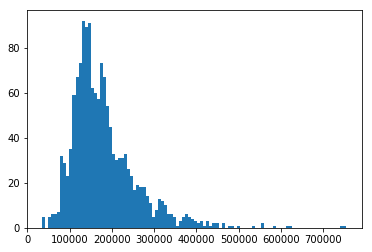

In [16]:
price_dist = plt.hist(train_data.SalePrice, bins=100)  ## 由直方圖來看，可以看出房價是呈現右偏的型態，通常針對偏態的數據都會做處理，
                                                       ## 像是取log或是使用預處理套件標準化。

In [18]:
train_data.head() ## .head()為列出該資料集前五筆資料，若要增加可在.head()中參數項設定，由此可以比較若直接使用文字資料較不易看出趨勢或問題。

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### 其他視覺化範例

Text(0,0.5,'SalePrice')

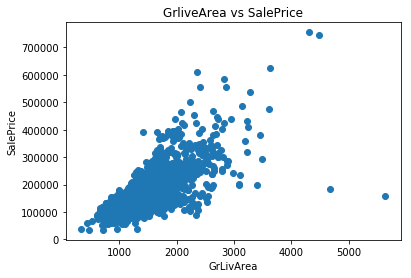

In [55]:
### 居住空間與房價資料散佈圖
ax = plt.subplot()
ax.scatter(train_data.GrLivArea, train_data.SalePrice)
ax.set_title('GrliveArea vs SalePrice')
ax.set_xlabel('GrLivArea')
ax.set_ylabel('SalePrice')

### 另外一個視覺化套 seaborn
相較於matplotlib，seaborn我認為畫出來的圖比較漂亮，而且使用起來也比較直觀一些，seaborn是一個base on matplotlib的API，詳細的使用方式與說明可以參考以下的資料：
1. https://seaborn.pydata.org/
2. https://medium.com/@yehjames/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC2-5%E8%AC%9B-%E8%B3%87%E6%96%99%E8%A6%96%E8%A6%BA%E5%8C%96-matplotlib-seaborn-plotly-75cd353d6d3f

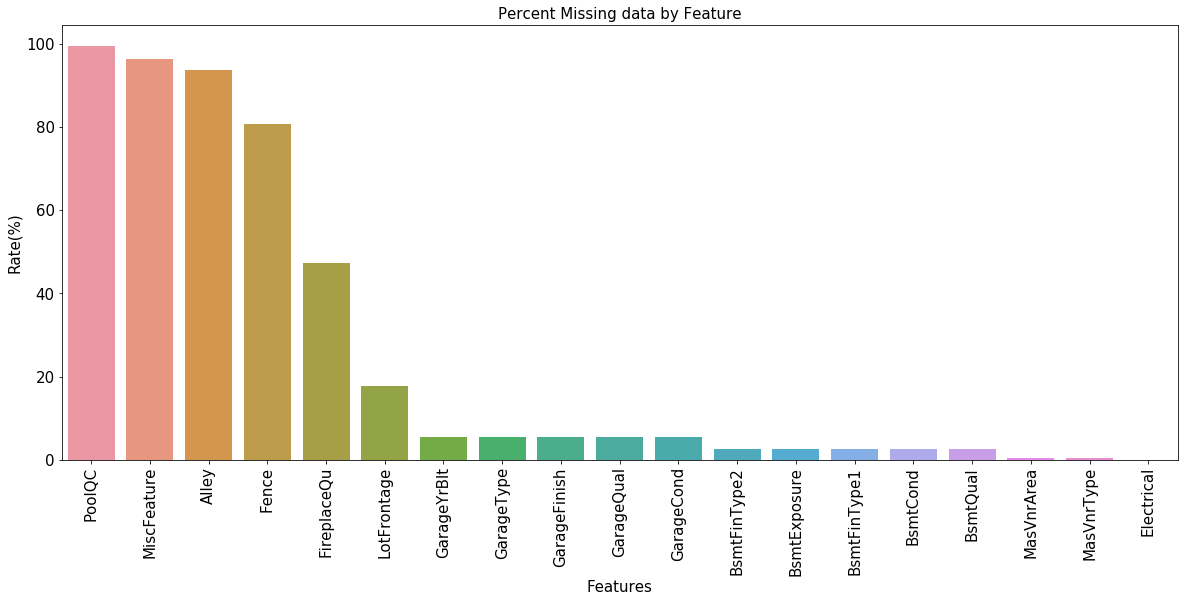

In [53]:
null_rate = train_data.isnull().sum() / len(train_data) *100
null_rate = null_rate[null_rate > 0]
null_rate = null_rate.sort_values(ascending=False)

import seaborn as sns
plt.figure(figsize=(20,8))
plt.xticks(rotation = 90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.title("Percent Missing data by Feature", fontsize = 15)
plt.xlabel("Features", fontsize = 15)
plt.ylabel("Rate(%)", fontsize = 15)
sns.barplot(x = null_rate.index, y = null_rate)

Text(0.5,1,'GrliveArea vs SalePrice')

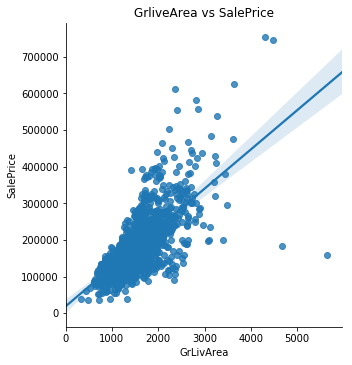

In [59]:
### 與上面同樣的圖，但是透過seaborn可以畫出趨勢線，而且也比較少行程式碼。
sns.lmplot(x = 'GrLivArea', y = 'SalePrice', data = train_data)
plt.title('GrliveArea vs SalePrice')

_____
# handle missing data
____

通常在處理缺失值是非常重要的，而缺失值的種類可分為幾類，也可以藉由缺失值來了解缺失原因。
推薦學習資源參考連結：
1. https://zhuanlan.zhihu.com/p/40775756

而對應缺失值的辦法可以簡單分為幾種： 1. 直接刪除 2. 填補缺失值 3. 不處理

另外對應缺失值的方式也會因為資料類型不同而補植方式不一樣，如類別型資料、數值型資料、時間等等。

#### 在處理缺失值我們會使用到scikit-learn套件

In [88]:
from sklearn.preprocessing import Imputer

### 直接刪除
直接刪除雖然簡單，但是資訊損失的最多。 可以直接使用pandas.Dataframe中的.dropna() 或 drop() function.

In [97]:
null_index = list(null_rate.index[:5])  ## 選擇捨棄掉前五個缺失值比例最高的features
train_data_drop = train_data.drop(null_index, axis = 1)
train_data_drop = train_data_drop.dropna()   ## 再將其他資料若有缺失值的資料都刪除
# train_data_drop.info()

### 填補缺失值
填補缺失值的做法有非常多種，比較常用的像是以平均數填補、以眾數填補等。

In [98]:
Bsmt_ls = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtHalfBath','BsmtFullBath']
Garg_ls = ['GarageCond','GarageQual','GarageFinish','GarageType','FireplaceQu']

for item in Bsmt_ls:  ## 我選擇將跟地下室有關的數據全部以平均值補值
    train_data[item].fillna(train_data[item].mean(), inplace = True)   
    
for item in Garg_ls:  ## 有關車庫的類別型資料我將缺失職補值為NAN（文字）
    train_data[item].fillna('NAN', inplace = True)
    
## 在此也可以使用sklearn的套件做補值，但是比較麻煩的是要轉換成array的型態才能夠丟進Imputer

# train_data_Bsmt = train_data[Bsmt_ls].values
# imputer = Imputer()
# train_data_Bsmt = imputer.fit_transform(train_data_Bsmt)
# train_data.info()

### 不處理
有些模型是可以處理缺失值的情況的，像是XGboost等模型。

-----
# Encoding
-----

在此指的是處理類別型的資料，因為類別型（文字）資料沒有辦法丟進data中訓練，因此要將它轉換成數值型的data，而最常使用的方式就是one-hot encoding 以及 label encoding。

首先要先import相關套件：

In [99]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [157]:
## 這裡使用剛剛跟車庫有關的類別型資料
## 因為“車庫狀況”的資訊應該是有程度上的差異，因此這裡使用labelencoder，將feature轉換成0,1,2,3,4,5的標籤
enc_label = LabelEncoder()
garage_cond = train_data.GarageCond
garage_cond_label = enc_label.fit_transform(garage_cond.values)
garage_cond = pd.DataFrame({'original_feature': garage_cond.values,
                           'transformed_feature': garage_cond_label})
# garage_cond.sample(20)


## One-hot encoder 的作法，如果資料之間並沒有程度上的差異，可以使用one-hot encoding，可以直接使用pandas中的方法
## 另外注意在做dummies variable時，
garage_type = pd.get_dummies(train_data.GarageType, drop_first= True)
# print(garage_type)


## 以下是sklearn的做法，個人認為比較麻煩，因為要先將類別型資料轉換為int，也就是先使用labelencoder之後，才能使用one-hot
# enc_One = OneHotEncoder(sparse=True)
# garage_type = train_data.GarageType.values
# garage_type = enc_label.fit_transform(garage_type)
# garage_type = garage_type.reshape(-1,1)
# garage_one_hot = enc_One.fit_transform(garage_type).toarray()
# print(garage_one_hot)

___
# split training and testing data
___

若先前的資料都處理好了後，就要將資料集分為training 以及testing，而這個步驟很簡單，因為scikit-learn套件有一個非常方便的功能。

首先來import相關套件：

In [158]:
from sklearn.model_selection import train_test_split

In [159]:
## 只需要使用這個套件就可以輕易將訓練與測試資料節分開
## 在train_test_split function中調整test_size，以及random_state。
X = train_data.drop(['SalePrice'], axis = 1)
y = train_data.SalePrice
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("訓練資料集: ", len(X_train))
print("測試資料集: ", len(X_test))

訓練資料集:  1022
測試資料集:  438


____
# Feature scaling
____

最後來到了特徵縮放的步驟，此步驟也可以透過scikit-learn套件來實現，而對於特徵縮放的相關資料連結如下：
1. https://blog.csdn.net/pipisorry/article/details/52247679

首先來import相關套件：       (這裡需要說明一下，因為在前面沒有完整的將資料清理乾淨，因此無法將全部的training data直接fit進去，因此取幾個feature練習）

In [190]:
from sklearn.preprocessing import StandardScaler, scale  ## 而其實特徵縮放也有更多的方法，像是MinMaxScaler函數，是將數值壓到0-1之間等等

/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/Users/apple/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


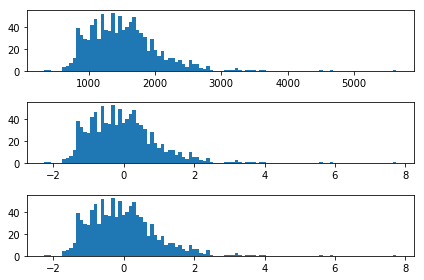

In [189]:
### 若使用scale沒有設定平均值與標準差，則等於轉換為平均值為0之常態分佈
GrLivArea_original = X_train.GrLivArea.values.reshape(-1,1)
fig, ax = plt.subplots(3,1)
ax[0].hist(GrLivArea_original, bins = 100)
GrLivArea_transform = scale(GrLivArea_original)
ax[1].hist(GrLivArea_transform, bins = 100)

### 若使用StandarScalar則要先宣告後fit，宣告時可以設定標轉差與平均值
stand_s = StandardScaler()
GrLivArea_transform_2 = stand_s.fit_transform(GrLivArea_original)
ax[2].hist(GrLivArea_transform_2, bins = 100)
fig.tight_layout()


#### 其實這個不算完整的data preprocessing，但是在AIA課程中已經有練習過，因此利用同樣的題目來筆記。也可以多參考kaggle神人們的kernel，會相當有幫助！